# Animal Behavior Modeling Arena (ABMA)

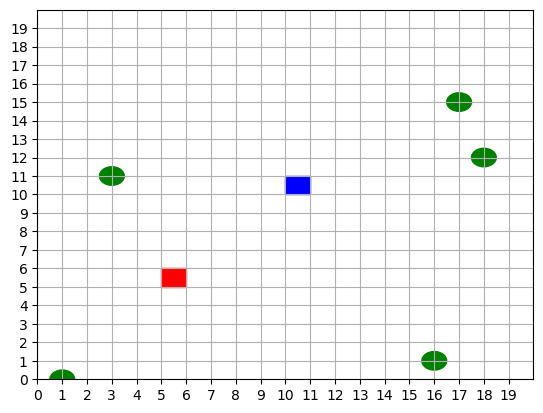

In [10]:
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.animation import FuncAnimation

class Agent:
    def __init__(self, unique_id, environment):
        self.unique_id = unique_id
        self.energy = 100  # Starting energy
        self.hunger = 0  # Hunger increases over time
        self.thirst = 0  # Thirst increases over time
        self.position = environment.get_random_position()  # Random starting position
        self.environment = environment  # Reference to the environment

    def move(self):
        """Agent moves to a nearby cell, incurring an energy cost."""
        new_position = self.environment.get_random_adjacent_position(self.position)
        self.position = new_position
        self.energy -= 1  # Energy cost of moving

    def find_resource(self):
        """Agent checks for nearby food/water and consumes it if found."""
        if self.environment.check_for_resource(self.position, resource_type='food'):
            self.energy += 10  # Gain energy from food
            self.hunger = 0  # Reset hunger
        elif self.environment.check_for_resource(self.position, resource_type='water'):
            self.thirst = 0  # Reset thirst

    def step(self):
        """Perform one step in the simulation."""
        # Hunger and thirst increase over time
        self.hunger += 1
        self.thirst += 1

        # Move if energy is still available
        if self.energy > 0:
            self.move()
            self.find_resource()

        # If hunger or thirst is too high, reduce energy further
        if self.hunger > 50 or self.thirst > 50:
            self.energy -= 2  # More severe energy loss from high hunger/thirst

class Environment:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.grid = [[None for _ in range(width)] for _ in range(height)]  # Empty grid
        self.resources = {'food': [], 'water': []}  # Positions of food and water

    def place_resource(self, resource_type, position):
        """Place a resource in the environment."""
        self.resources[resource_type].append(position)
        self.grid[position[1]][position[0]] = resource_type

    def get_random_position(self):
        """Get a random position in the environment."""
        x = random.randint(0, self.width - 1)
        y = random.randint(0, self.height - 1)
        return (x, y)

    def get_random_adjacent_position(self, position):
        """Get a random adjacent position to the current one."""
        x, y = position
        adjacent_positions = [
            (x - 1, y), (x + 1, y), (x, y - 1), (x, y + 1)
        ]
        valid_positions = [p for p in adjacent_positions if self.is_within_bounds(p)]
        return random.choice(valid_positions)

    def is_within_bounds(self, position):
        """Check if the position is within the grid bounds."""
        x, y = position
        return 0 <= x < self.width and 0 <= y < self.height

    def check_for_resource(self, position, resource_type):
        """Check if there's a resource at the given position."""
        return position in self.resources[resource_type]

# Initialize environment and agents
environment = Environment(width=20, height=20)
environment.place_resource('food', (5, 5))
environment.place_resource('water', (10, 10))

agents = [Agent(i, environment) for i in range(5)]

# Visualization setup
fig, ax = plt.subplots()
ax.set_xlim(0, environment.width)
ax.set_ylim(0, environment.height)
ax.set_xticks(range(environment.width))
ax.set_yticks(range(environment.height))
ax.grid(True)

# Draw resources
for resource_type, positions in environment.resources.items():
    for pos in positions:
        if resource_type == 'food':
            ax.add_patch(patches.Rectangle(pos, 1, 1, color='red'))
        elif resource_type == 'water':
            ax.add_patch(patches.Rectangle(pos, 1, 1, color='blue'))

# Draw agents
agent_patches = [patches.Circle(agent.position, 0.5, color='green') for agent in agents]
for patch in agent_patches:
    ax.add_patch(patch)

def update(frame):
    for agent, patch in zip(agents, agent_patches):
        agent.step()
        patch.center = agent.position
    return agent_patches

ani = FuncAnimation(fig, update, frames=range(100), blit=True, repeat=False)
plt.show()